# Picontrol 100 year average to Last Twenty Years of data (Thetao)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis

In [2]:
from dask.distributed import Client
from dask.distributed import LocalCluster
client = Client(dashboard_address=':8082')
client


/home/tu.temple.edu/tun27673/miniconda3/envs/antarctic_southernocean_2/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8082 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41889 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41889/status,
Dashboard: http://127.0.0.1:41889/status,Workers: 14
Total threads: 112,Total memory: 755.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45885,Workers: 14
Dashboard: http://127.0.0.1:41889/status,Total threads: 112
Started: Just now,Total memory: 755.56 GiB
Comm: tcp://127.0.0.1:33001,Total threads: 8
Dashboard: http://127.0.0.1:43509/status,Memory: 53.97 GiB
Nanny: tcp://127.0.0.1:35347,


In [3]:
# import Thetao and static datasets
thetao = xr.open_mfdataset('/backup/tuq41374/model_output/sofia/antwater/gfdl-cm4/ocean/annual/thetao/*.nc',chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)
static = xr.open_dataset('/home/pachamama/shared/model_output/sofia/cm4/static/ocean_monthly_z.static.nc',chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

In [4]:
# import piControl dataset, and slice to the time you need
picontrol = xr.open_mfdataset('/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/ocean/monthly/thetao/*.nc',chunks={'time':1200,'z_l':1,'x':90 ,'y':90 },drop_variables=['average_DT', 'average_T1', 'average_T2'],).sel(time=slice("0251-01-16", "0350-12-16"))

In [5]:
picontrol

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 1200, lev: 35, y: 1080, x: 1440, vertex: 4)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * time       (time) object 0251-01-16 12:00:00 ... 0350-12-16 12:00:00
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lon        (y, x) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
Dimensions without coordinates: vertex
Data variables:
    thetao     (time, lev, y, x) float32 dask.array<chunksize=(240, 35, 90, 90), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(240, 35, 2), meta=np.ndarray>
    lat_bnds   (time, y, x, vertex) float32 dask.array<chunksize=(240, 90, 90, 4), meta=np.ndarray>
    lon_bnds   (time, y, x, vertex) float32 dask.array<chunksize=(240, 90, 90, 4), meta=np.ndarray>
Attributes: (12/46)
    title:                  NOAA GFDL GFDL-CM4 model output prepared for CMIP...
    external_variables:     areacello volcello
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               Omon
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    sub_experiment_id:      none
    tracking_id:            hdl:21.14100/0c09320b-3599-4aec-b1ae-364149665230
    variable_id:            thetao
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [5]:
temp = thetao.thetao # Extract Thetao DataArray from the Thetao DataSet
piTemp = picontrol.thetao.isel(lev=0)
#piTemp.isel(lev=0)

In [6]:
picontrol["geolon"] = static.geolon
picontrol["geolat"] = static.geolat
thetao["geolon"] = static.geolon
thetao["geolat"] = static.geolat
diff["geolon"] = static.geolon
diff["geolat"] = static.geolat

NameError: name 'diff' is not defined

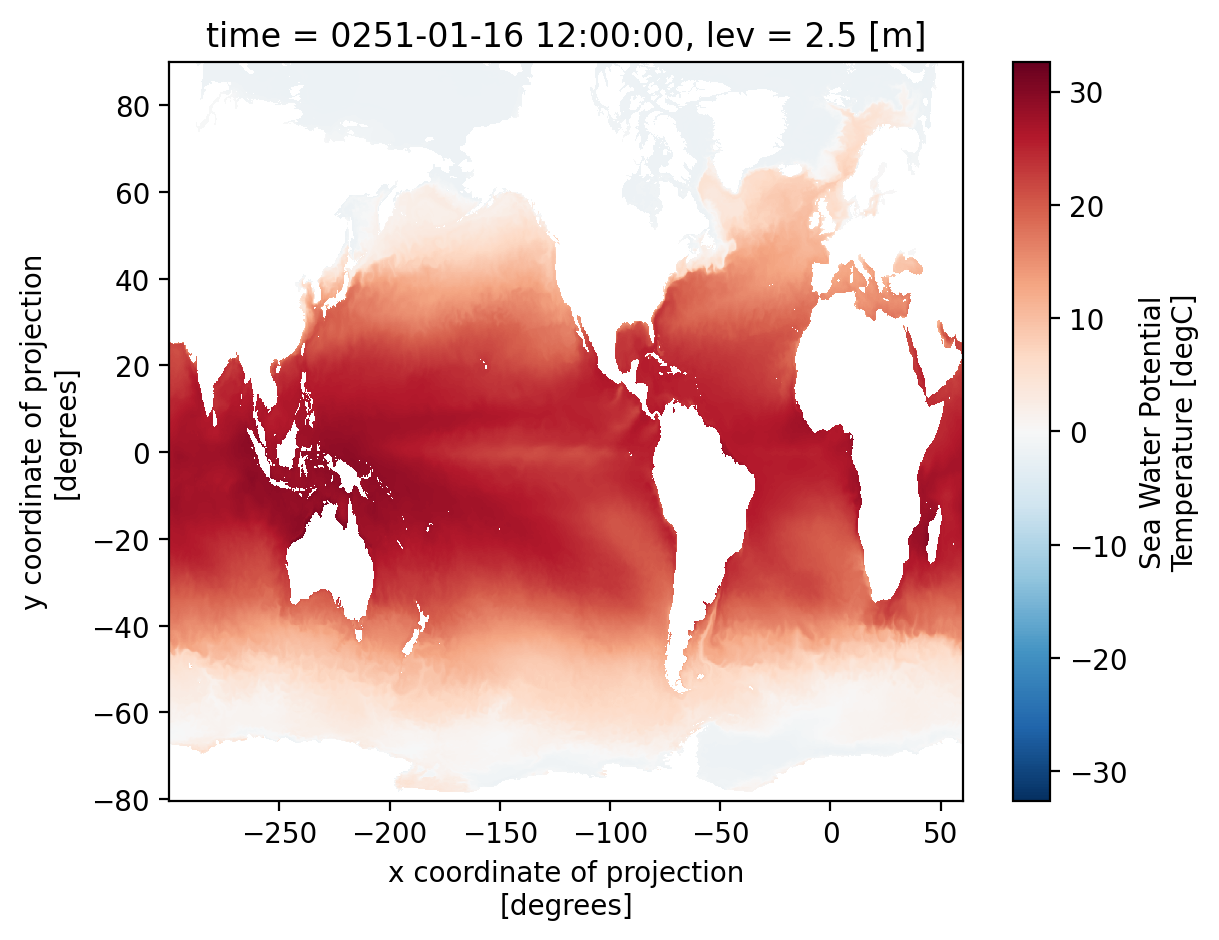

In [7]:
piTemp.isel(time=0).plot()

In [8]:
SSTpi_251_350 = piTemp.mean(dim="time")
SSTpi_251_350

<xarray.DataArray 'thetao' (y: 1080, x: 1440)>
dask.array<mean_agg-aggregate, shape=(1080, 1440), dtype=float32, chunksize=(90, 90), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.28 59.53 59.78 60.03
  * y        (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.62 89.73 89.84 89.95
    lev      float64 2.5
    lon      (y, x) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    lat      (y, x) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>

In [9]:
SSTAVE = piTemp.mean("time")
SSTPI = SSTAVE.rename({'x':'xh'}).rename({'y':'yh'})
SSTPI

<xarray.DataArray 'thetao' (yh: 1080, xh: 1440)>
dask.array<mean_agg-aggregate, shape=(1080, 1440), dtype=float32, chunksize=(90, 90), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    lev      float64 2.5
    lon      (yh, xh) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    lat      (yh, xh) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>

Text(0.5, 1.0, '100 Year Pre-Industrial Control Average')

<Figure size 1200x800 with 0 Axes>

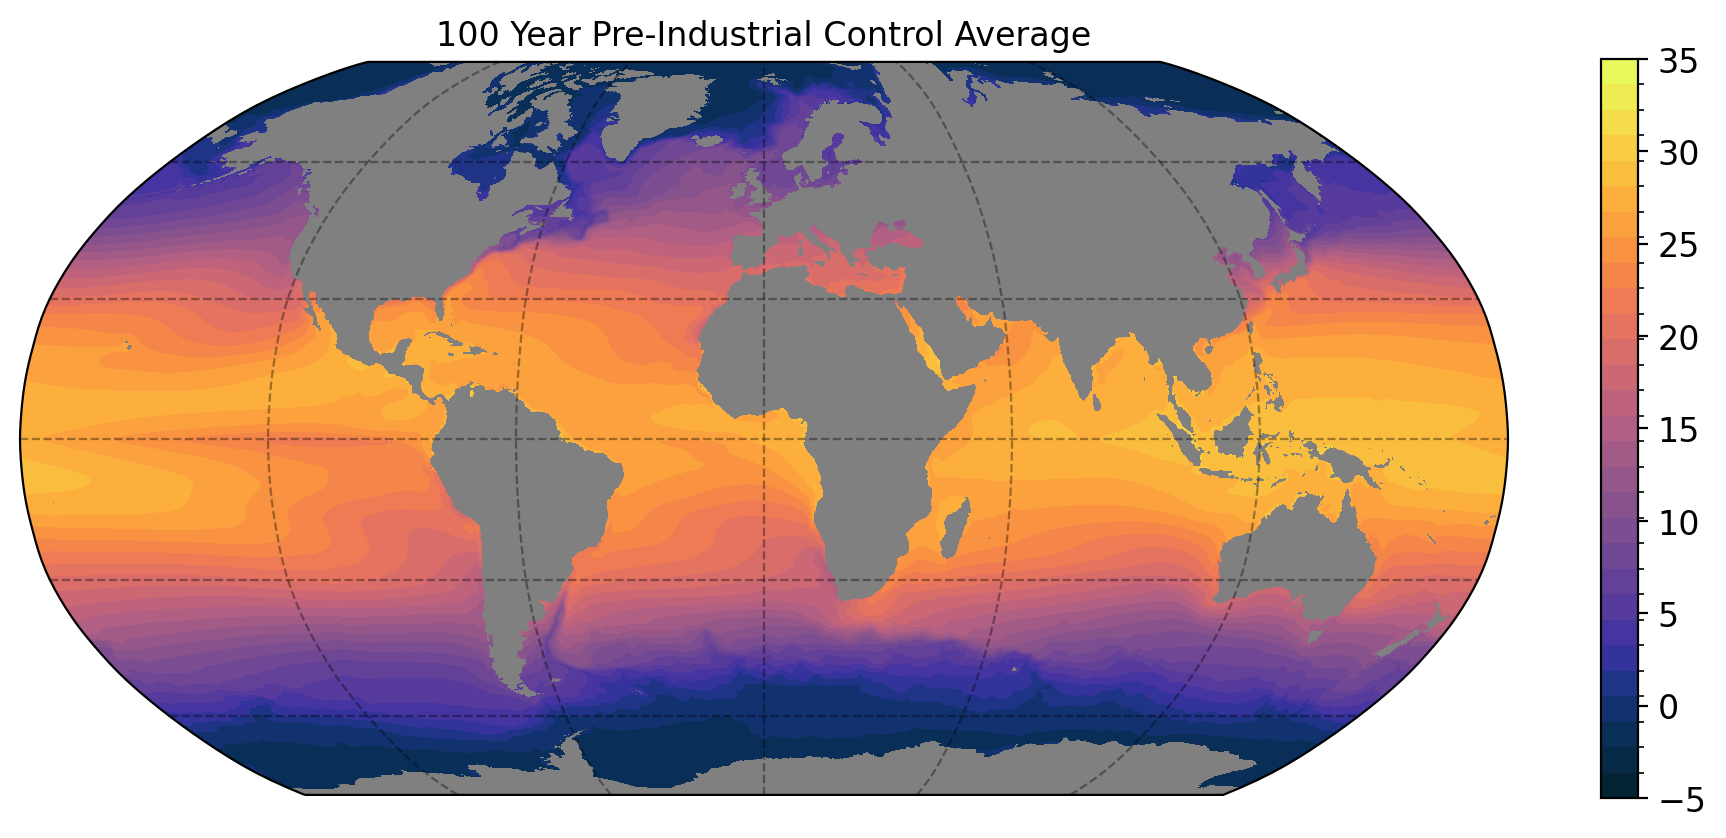

In [10]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='gray')

plt.figure(figsize=[12,8])
p = SSTPI.plot.contourf(x='xh', y='yh',
                        vmin=-5,vmax=35,
                      cmap=cmocean.cm.thermal,
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False, levels= 30)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[-5, 0, 5, 10, 15, 20, 25, 30, 35],shrink=0.6,extend='both')
cb.ax.tick_params(labelsize=12)
plt.title("100 Year Pre-Industrial Control Average")

Text(0.5, 1.0, '100 Year Pi Control Average')

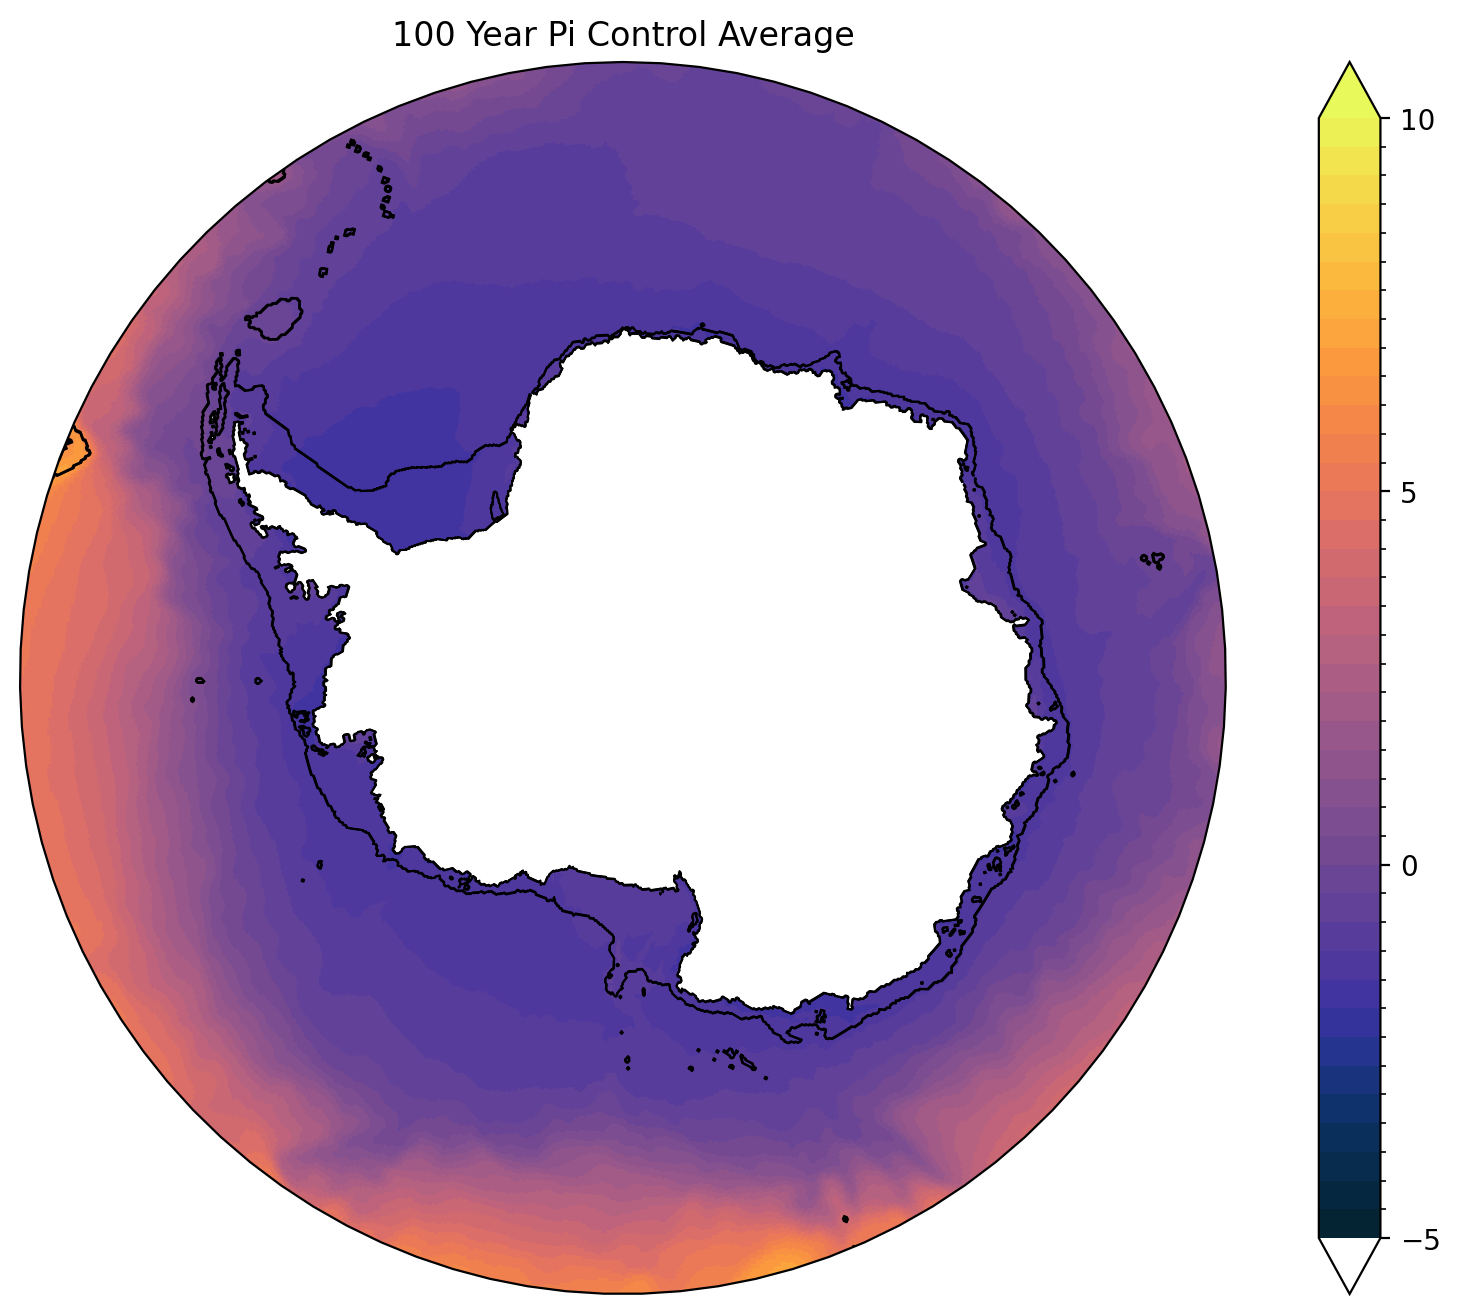

In [12]:
depth = static["deptho"]
depth

shelf = depth.where(depth<1000)*0
shelfmask = shelf.isin(0)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

plt.figure(figsize=[12,8])

projection=ccrs.SouthPolarStereo()
ax = plt.axes(projection=projection)
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax.set_boundary(circle,transform=ax.transAxes)

p = SSTPI.plot(x='xh', y='yh',
                        vmin=-5,vmax=10,
                        cmap=cmocean.cm.thermal,
                        transform=ccrs.PlateCarree(),add_colorbar=False, levels= 40)
shelfmask.plot.contour(x='xh', y='yh',transform=ccrs.PlateCarree(),colors='black', linewidths = .5)
cb = plt.colorbar(p, ticks=[-5, 0, 5, 10],extend='both')
plt.title("100 Year Pi Control Average")

In [34]:
lasttwenty = temp.isel(z_l=0).sel(time=slice("0080-07-02", "0100-07-02")).mean(dim="time")
lasttwenty.rename({'z_l':'lev'})

<xarray.DataArray 'thetao' (yh: 1080, xh: 1440)>
dask.array<mean_agg-aggregate, shape=(1080, 1440), dtype=float32, chunksize=(1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    lev      float64 2.5

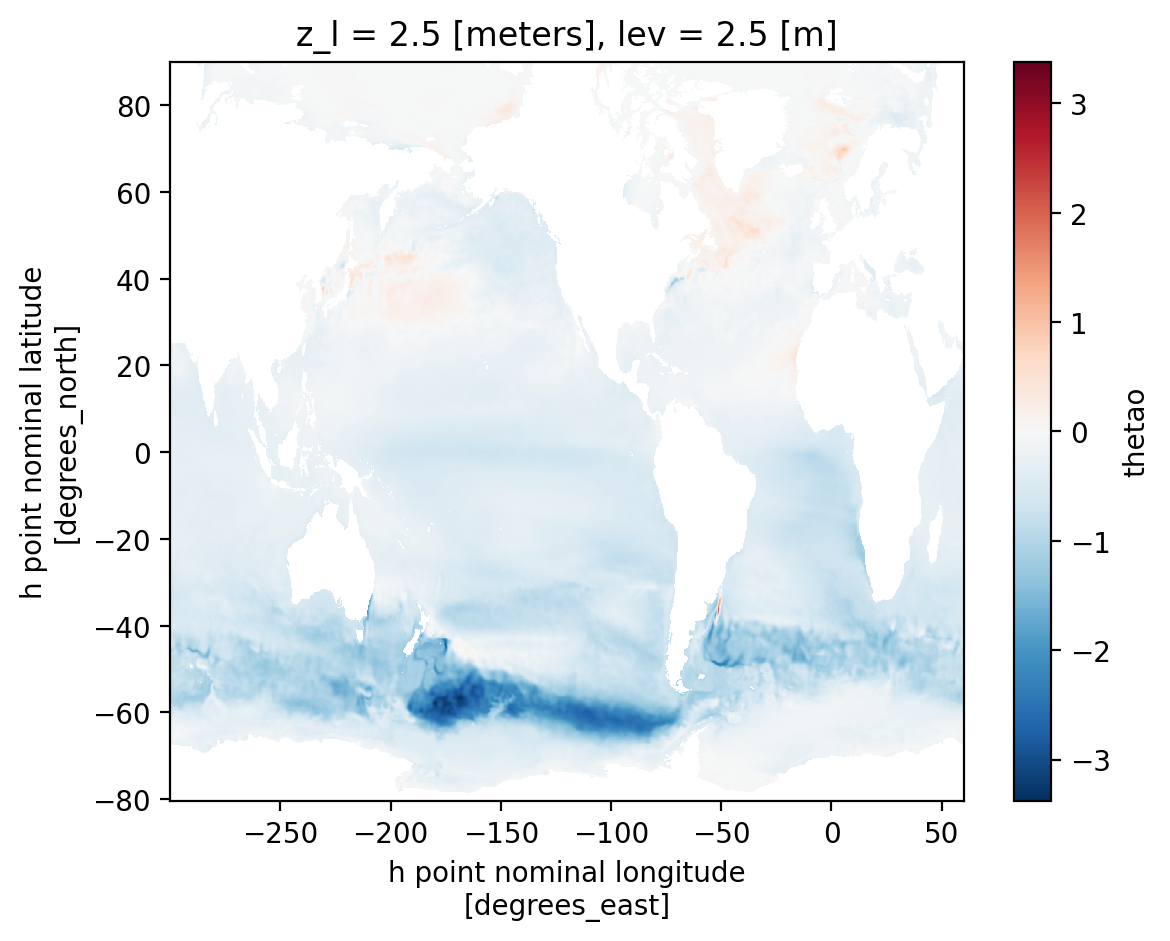

In [37]:
diff = lasttwenty - SSTPI
diff.plot()

Text(0.5, 1.0, '100yr PI to Last Twenty yr Difference')

<Figure size 1200x800 with 0 Axes>

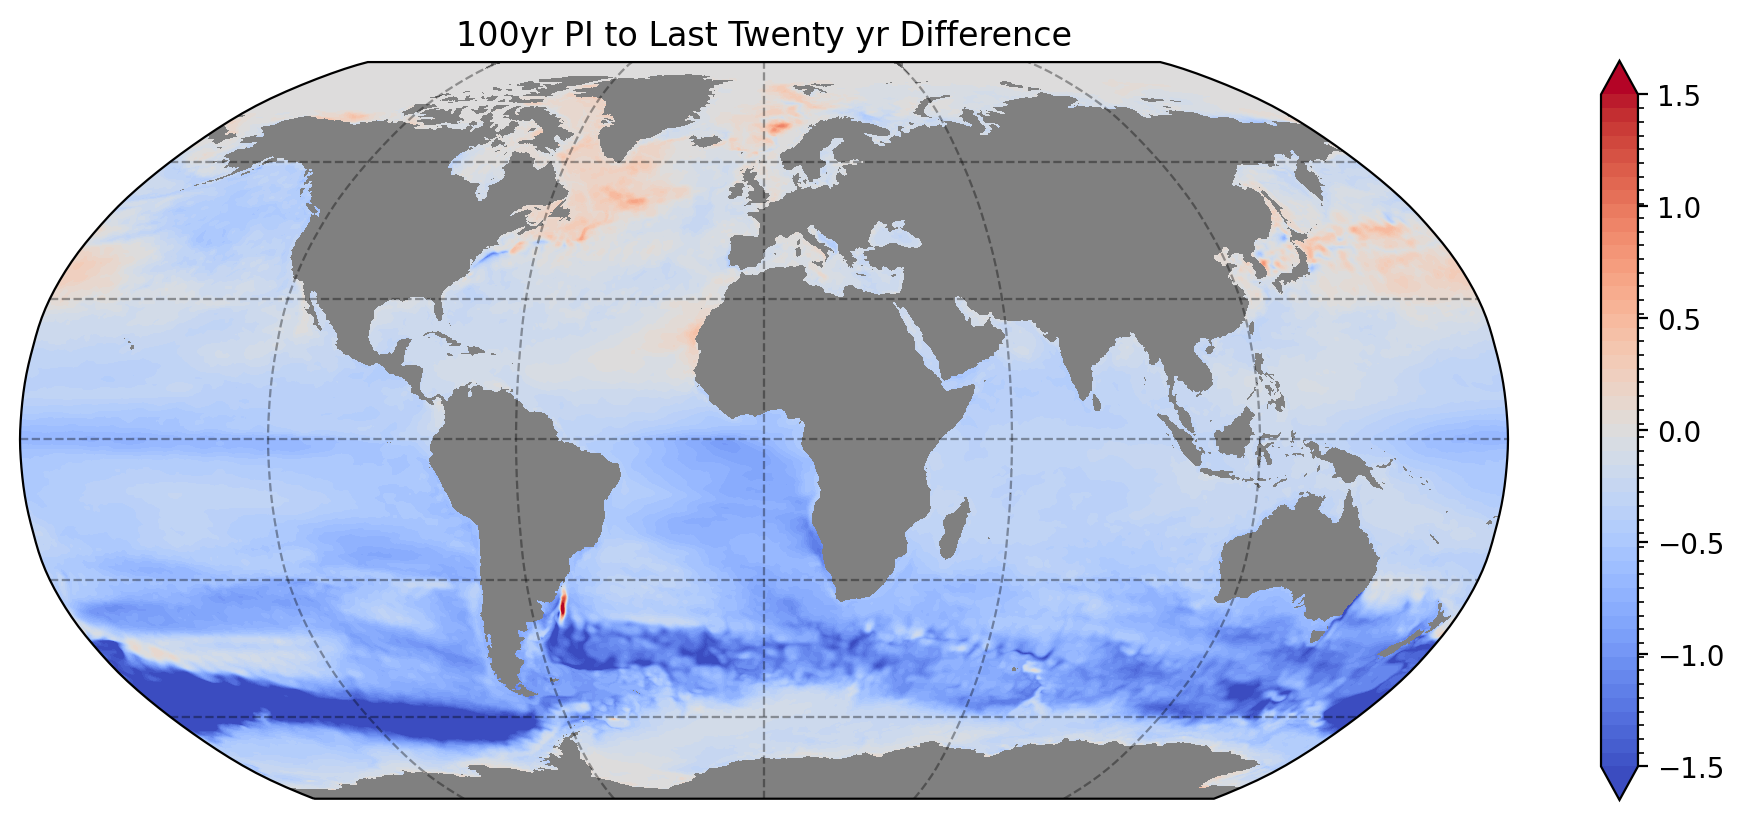

In [47]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='gray')

plt.figure(figsize=[12,8])
p = diff.plot.contourf(x='geolon', y='geolat',
                        vmin=-1.5,vmax=1.5,
                      cmap='coolwarm',
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False, levels= 50)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[-1.5, -1, -.5, 0, .5, 1, 1.5],shrink=0.6,extend='both')
#cb.ax.tick_params(labelsize=12)
plt.title("100yr PI to Last Twenty yr Difference")

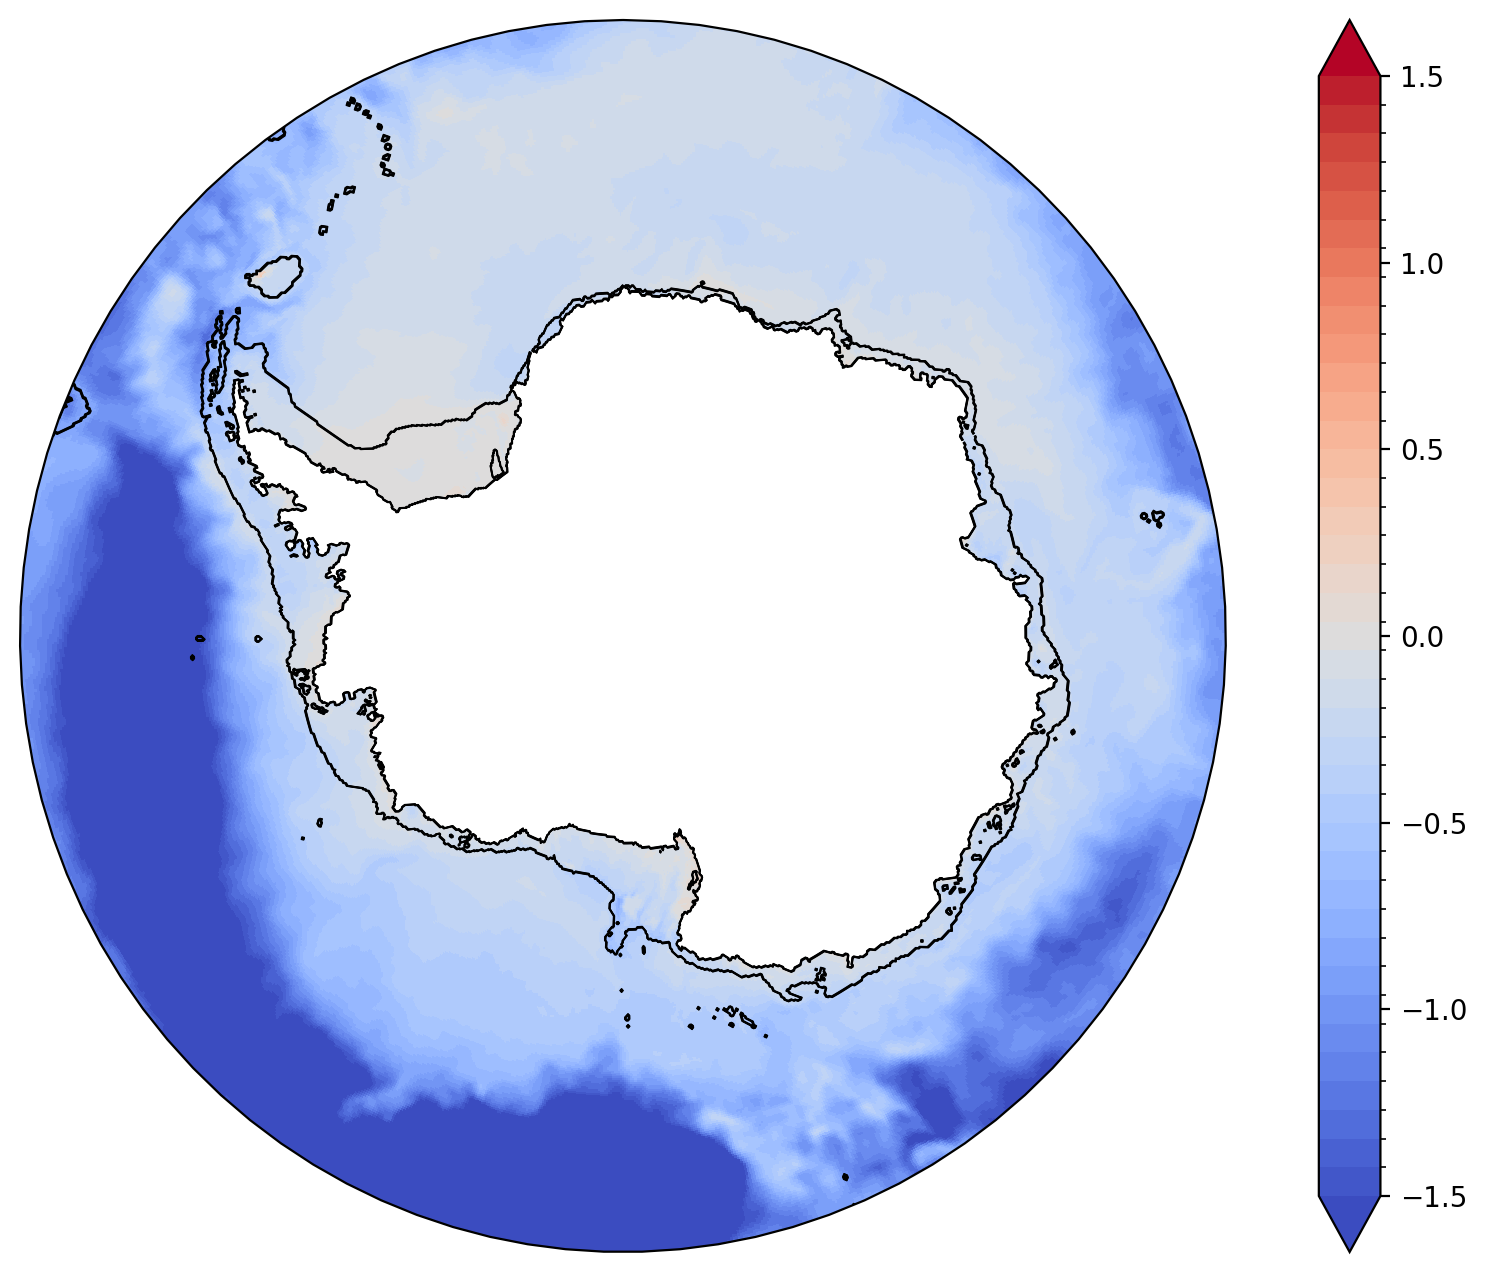

In [51]:
depth = static["deptho"]
depth

shelf = depth.where(depth<1000)*0
shelfmask = shelf.isin(0)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

plt.figure(figsize=[12,8])

projection=ccrs.SouthPolarStereo()
ax = plt.axes(projection=projection)
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax.set_boundary(circle,transform=ax.transAxes)

p = diff.plot(x='xh', y='yh',
                        vmin=-1.5,vmax=1.5,
                        cmap='coolwarm',
                        transform=ccrs.PlateCarree(),add_colorbar=False, levels= 40)
shelfmask.plot.contour(x='xh', y='yh',transform=ccrs.PlateCarree(),colors='black', linewidths = .5)
cb = plt.colorbar(p, ticks=[-1.5,-1,-.5,0,.5,1,1.5],extend='both')